In [2]:
!git clone https://github.com/openaifab/fair.git

Cloning into 'fair'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 39 (delta 1), reused 0 (delta 0), pack-reused 28
Unpacking objects: 100% (39/39), done.
Checking out files: 100% (29/29), done.
fatal: destination path 'fair' already exists and is not an empty directory.


##If you are using colab, edit:  
font = r'/content/fair/mingliu.ttc' in PlotWordCloud funtion OpenFablibrary.py

In [3]:
!pip install ckiptagger

In [4]:
%cd fair
%pwd

/content/fair


'/content/fair'

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import pickle
from gensim.models import word2vec
import logging
import random

In [0]:
from OpenFabLibrary import JeibaCutWords
from OpenFabLibrary import AppendKeywordCheck

##參數設定

In [0]:
LEAGAL_CLASS = 0
VIOLATE_CLASS = 1

data_dir = "/".join((".", "data"))

##讀取training set data

In [8]:
data_source = "train.csv"
data_df = pd.read_csv(open(data_dir + '/' + data_source, 'r', encoding='utf8'), delimiter=',')
print("違法廣告: %d則" % (data_df[data_df["Class"] == 1].shape[0]))
print("合法廣告: %d則" % (data_df[data_df["Class"] == 0].shape[0]))
print(data_df.head())

違法廣告: 583則
合法廣告: 354則
   ID            Name                                        Description  Class
0   0  鹼性王梅精飴禮盒(5包/盒)    「參與糖分代謝…抑制壞菌生長…遠離疾病…延年益壽」「骨質疏鬆症是僅次於心血管問題的第2大疾病」      1
1   1           舒眠晚安粉  「增強抵抗力...而當長期處於熬夜、壓力大的生理狀態下...造成易倦、代謝下降及情緒不穩等問...      1
2   2  長庚研發元氣草本清晰靈光專案  「磷脂醯絲氨酸升記憶、促進大腦新陳代謝...改善阿茲海默氏症症狀，提升代謝力14.8%、減少...      1
3   3  長庚研發緩釋B群能量滿分專案  「長庚醫學團隊研發，新陳代謝科、減重門診、家醫科指定處方...女試用者竹庭口述：懷孕胖28公...      1
4   4           夜爆燃膠囊  淨化腸胃好健康…促進腸胃蠕動…瘦身…燃燒脂肪…減肥藥…瘦的有線條…控制肥腰肚…長期便秘…毒素...      1


##斷詞方法選擇

In [9]:
# 斷詞處理
train_data_df = JeibaCutWords(data_df)
print(train_data_df.head())

Building prefix dict from /content/fair/Jeiba/dict.txt.big ...
Dumping model to file cache /tmp/jieba.u61e261749d9b9aaf205c1189a189dc8f.cache
Loading model cost 1.576 seconds.
Prefix dict has been built successfully.


   id                                           sentence  class
0   0  [「, 參與, 糖分, 代謝, 抑制, 壞菌, 生長, 遠離, 疾病, 延年益壽, 益壽, ...      1
1   1  [「, 增強, 抵抗, 抵抗力, 抗力, 長期, 處於, 熬夜, 壓力, 生理, 狀態, 下...      1
2   2  [「, 磷脂, 醯, 絲氨酸, 氨酸, 升, 記憶, 促進, 大腦, 新陳代謝, 代謝, 改...      1
3   3  [「, 長庚, 醫學, 團隊, 研發, 新陳代謝, 代謝, 科, 減重, 門診, 家, 醫科...      1
4   4  [淨化, 腸胃, 好, 健康, 促進, 腸胃, 蠕動, 瘦身, 燃燒, 脂肪, 減肥, 減肥...      1


##關鍵字檢查

In [10]:
# 關鍵字檢查
train_data_df['keyword_flag'], _ = AppendKeywordCheck(train_data_df)
print(train_data_df.head(5))

# 儲存為pickle格式檔案
with open(data_dir + '/' + 'train_tokenized', 'wb') as file:
    pickle.dump(train_data_df, file)

   id                                           sentence  class  keyword_flag
0   0  [「, 參與, 糖分, 代謝, 抑制, 壞菌, 生長, 遠離, 疾病, 延年益壽, 益壽, ...      1             1
1   1  [「, 增強, 抵抗, 抵抗力, 抗力, 長期, 處於, 熬夜, 壓力, 生理, 狀態, 下...      1             1
2   2  [「, 磷脂, 醯, 絲氨酸, 氨酸, 升, 記憶, 促進, 大腦, 新陳代謝, 代謝, 改...      1             1
3   3  [「, 長庚, 醫學, 團隊, 研發, 新陳代謝, 代謝, 科, 減重, 門診, 家, 醫科...      1             1
4   4  [淨化, 腸胃, 好, 健康, 促進, 腸胃, 蠕動, 瘦身, 燃燒, 脂肪, 減肥, 減肥...      1             1


##製作文字雲

In [11]:
!wget --no-check-certificate \
    https://storage.googleapis.com/ai_data_colab/mingliu.ttc \
    -O mingliu.ttc

--2020-05-13 02:05:49--  https://storage.googleapis.com/ai_data_colab/mingliu.ttc
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32217124 (31M) [application/octet-stream]
Saving to: ‘mingliu.ttc’

mingliu.ttc         100%[===================>]  30.72M   145MB/s    in 0.2s    

2020-05-13 02:05:49 (145 MB/s) - ‘mingliu.ttc’ saved [32217124/32217124]



合法廣告文字雲:


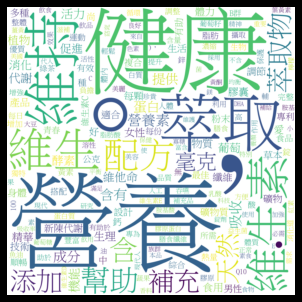

違法廣告文字雲:


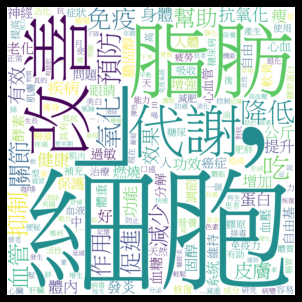

In [0]:
from OpenFabLibrary import ShowWordCloud

with open(data_dir + '/' + 'train_tokenized', 'rb') as file:
    train_tokenized_df = pickle.load(file)

ShowWordCloud(train_tokenized_df)

##Word2Vec轉換

In [0]:
with open(data_dir + '/' + 'train_tokenized', 'rb') as file:
    train_tokenized_df = pickle.load(file)

corpus_source = train_tokenized_df['sentence']
print(corpus_source)

0      [參與, 糖分, 代謝, 抑制, 壞菌, 生長, 遠離, 疾病, 延年益壽, 益壽, 骨質,...
1      [增強, 抵抗, 抵抗力, 抗力, 長期, 處於, 熬夜, 壓力, 生理, 狀態, 下, 造...
2      [磷脂, 醯, 絲氨酸, 氨酸, 升, 記憶, 促進, 大腦, 新陳代謝, 代謝, 改善, ...
3      [長庚, 醫學, 團隊, 研發, 新陳代謝, 代謝, 科, 減重, 門診, 家, 醫科, 指...
4      [淨化, 腸胃, 好, 健康, 促進, 腸胃, 蠕動, 瘦身, 燃燒, 脂肪, 減肥, 減肥...
                             ...                        
932    [熟齡, 男性, 營養, 補助, 補助品, 增添, 男性, 魅力, 含, 強健, 成分, 燕...
933    [膠原, 膠原蛋白, 蛋白, 馬, 胎盤, 日本, 本原, 原裝, 裝進, 進口, 每瓶, ...
934    [獨特, 天然, 防曬, 配方, 每份, 含有, 黃金, 番茄, 粉末, 660, 毫克, ...
935    [檸檬, 蘋果, 蘋果酸, 果酸, 鈣, 形式, 錠, 含有, 800, 毫克, 吸收, 收...
936    [雙效, 合一, 一發, 發酵, 配方, 日本, 本原, 原裝, 裝進, 進口, 天然, 納...
Name: sentence, Length: 937, dtype: object


##設定Word2Vec參數並訓練詞向量

In [0]:
WORD2VEC_DIMENTION = 128
logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)

def TrainWord2VecModel(input_corpus):
    # build word2vec
    # sg=0 CBOW ; sg=1 skip-gram
    model = word2vec.Word2Vec(size=WORD2VEC_DIMENTION, min_count=5, window=5, sg=0)

    # build vocabulary
    model.build_vocab(input_corpus)

    # train word2vec model ; shuffle data every epoch
    for i in range(20):
        print("%d-th training" % (i))
        random.shuffle(input_corpus)
        model.train(input_corpus, total_examples=len(input_corpus), epochs=1)

    ## save model
    model.save('word2vec_model/CBOW')

In [0]:
# 若要用已經訓練好的詞向量，這一步可以不做
# 若要訓練新的詞向量，把註解拿掉
# 現階段使用pre-trained mode zh, 300d, 50101 words
TrainWord2VecModel(corpus_source)

2020-05-13 00:49:26,291: INFO: collecting all words and their counts
2020-05-13 00:49:26,292: INFO: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-13 00:49:26,308: INFO: collected 9192 word types from a corpus of 54944 raw words and 937 sentences
2020-05-13 00:49:26,309: INFO: Loading a fresh vocabulary
2020-05-13 00:49:26,317: INFO: effective_min_count=5 retains 2289 unique words (24% of original 9192, drops 6903)
2020-05-13 00:49:26,318: INFO: effective_min_count=5 leaves 43519 word corpus (79% of original 54944, drops 11425)
2020-05-13 00:49:26,328: INFO: deleting the raw counts dictionary of 9192 items
2020-05-13 00:49:26,329: INFO: sample=0.001 downsamples 46 most-common words
2020-05-13 00:49:26,329: INFO: downsampling leaves estimated 41140 word corpus (94.5% of prior 43519)
2020-05-13 00:49:26,337: INFO: estimated required memory for 2289 words and 128 dimensions: 3488436 bytes
2020-05-13 00:49:26,338: INFO: resetting layer weights
/usr/lib/python3.6/

0-th training
1-th training


2020-05-13 00:49:27,038: WARNING: Effective 'alpha' higher than previous training cycles
2020-05-13 00:49:27,039: INFO: training model with 3 workers on 2289 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2020-05-13 00:49:27,090: INFO: worker thread finished; awaiting finish of 2 more threads
2020-05-13 00:49:27,092: INFO: worker thread finished; awaiting finish of 1 more threads
2020-05-13 00:49:27,096: INFO: worker thread finished; awaiting finish of 0 more threads
2020-05-13 00:49:27,097: INFO: EPOCH - 1 : training on 54944 raw words (41159 effective words) took 0.1s, 800820 effective words/s
2020-05-13 00:49:27,097: INFO: training on a 54944 raw words (41159 effective words) took 0.1s, 716473 effective words/s
2020-05-13 00:49:27,098: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-05-13 00:49:27,238: WARNING: Effective 'alpha' higher than previous training cycles
2020-05-13 00:49:27,239: INFO:

2-th training
3-th training


2020-05-13 00:49:27,433: WARNING: Effective 'alpha' higher than previous training cycles
2020-05-13 00:49:27,434: INFO: training model with 3 workers on 2289 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2020-05-13 00:49:27,486: INFO: worker thread finished; awaiting finish of 2 more threads
2020-05-13 00:49:27,487: INFO: worker thread finished; awaiting finish of 1 more threads
2020-05-13 00:49:27,491: INFO: worker thread finished; awaiting finish of 0 more threads
2020-05-13 00:49:27,492: INFO: EPOCH - 1 : training on 54944 raw words (41173 effective words) took 0.1s, 797346 effective words/s
2020-05-13 00:49:27,493: INFO: training on a 54944 raw words (41173 effective words) took 0.1s, 725605 effective words/s
2020-05-13 00:49:27,493: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-05-13 00:49:27,631: WARNING: Effective 'alpha' higher than previous training cycles
2020-05-13 00:49:27,632: INFO:

4-th training
5-th training


2020-05-13 00:49:27,825: WARNING: Effective 'alpha' higher than previous training cycles
2020-05-13 00:49:27,826: INFO: training model with 3 workers on 2289 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2020-05-13 00:49:27,869: INFO: worker thread finished; awaiting finish of 2 more threads
2020-05-13 00:49:27,881: INFO: worker thread finished; awaiting finish of 1 more threads
2020-05-13 00:49:27,885: INFO: worker thread finished; awaiting finish of 0 more threads
2020-05-13 00:49:27,886: INFO: EPOCH - 1 : training on 54944 raw words (41077 effective words) took 0.1s, 763141 effective words/s
2020-05-13 00:49:27,886: INFO: training on a 54944 raw words (41077 effective words) took 0.1s, 685295 effective words/s
2020-05-13 00:49:27,889: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-05-13 00:49:28,026: WARNING: Effective 'alpha' higher than previous training cycles
2020-05-13 00:49:28,027: INFO:

6-th training
7-th training


2020-05-13 00:49:28,226: WARNING: Effective 'alpha' higher than previous training cycles
2020-05-13 00:49:28,227: INFO: training model with 3 workers on 2289 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2020-05-13 00:49:28,282: INFO: worker thread finished; awaiting finish of 2 more threads
2020-05-13 00:49:28,285: INFO: worker thread finished; awaiting finish of 1 more threads
2020-05-13 00:49:28,289: INFO: worker thread finished; awaiting finish of 0 more threads
2020-05-13 00:49:28,289: INFO: EPOCH - 1 : training on 54944 raw words (41107 effective words) took 0.1s, 730413 effective words/s
2020-05-13 00:49:28,290: INFO: training on a 54944 raw words (41107 effective words) took 0.1s, 658755 effective words/s
2020-05-13 00:49:28,291: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-05-13 00:49:28,423: WARNING: Effective 'alpha' higher than previous training cycles
2020-05-13 00:49:28,425: INFO:

8-th training
9-th training


2020-05-13 00:49:28,623: WARNING: Effective 'alpha' higher than previous training cycles
2020-05-13 00:49:28,623: INFO: training model with 3 workers on 2289 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2020-05-13 00:49:28,668: INFO: worker thread finished; awaiting finish of 2 more threads
2020-05-13 00:49:28,676: INFO: worker thread finished; awaiting finish of 1 more threads
2020-05-13 00:49:28,684: INFO: worker thread finished; awaiting finish of 0 more threads
2020-05-13 00:49:28,685: INFO: EPOCH - 1 : training on 54944 raw words (41177 effective words) took 0.1s, 747760 effective words/s
2020-05-13 00:49:28,686: INFO: training on a 54944 raw words (41177 effective words) took 0.1s, 661458 effective words/s
2020-05-13 00:49:28,687: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-05-13 00:49:28,818: WARNING: Effective 'alpha' higher than previous training cycles
2020-05-13 00:49:28,818: INFO:

10-th training
11-th training


2020-05-13 00:49:29,010: WARNING: Effective 'alpha' higher than previous training cycles
2020-05-13 00:49:29,011: INFO: training model with 3 workers on 2289 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2020-05-13 00:49:29,065: INFO: worker thread finished; awaiting finish of 2 more threads
2020-05-13 00:49:29,068: INFO: worker thread finished; awaiting finish of 1 more threads
2020-05-13 00:49:29,073: INFO: worker thread finished; awaiting finish of 0 more threads
2020-05-13 00:49:29,073: INFO: EPOCH - 1 : training on 54944 raw words (41155 effective words) took 0.1s, 732513 effective words/s
2020-05-13 00:49:29,074: INFO: training on a 54944 raw words (41155 effective words) took 0.1s, 656520 effective words/s
2020-05-13 00:49:29,077: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-05-13 00:49:29,209: WARNING: Effective 'alpha' higher than previous training cycles
2020-05-13 00:49:29,210: INFO:

12-th training
13-th training


2020-05-13 00:49:29,411: WARNING: Effective 'alpha' higher than previous training cycles
2020-05-13 00:49:29,412: INFO: training model with 3 workers on 2289 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2020-05-13 00:49:29,457: INFO: worker thread finished; awaiting finish of 2 more threads
2020-05-13 00:49:29,465: INFO: worker thread finished; awaiting finish of 1 more threads
2020-05-13 00:49:29,470: INFO: worker thread finished; awaiting finish of 0 more threads
2020-05-13 00:49:29,471: INFO: EPOCH - 1 : training on 54944 raw words (41171 effective words) took 0.1s, 776585 effective words/s
2020-05-13 00:49:29,472: INFO: training on a 54944 raw words (41171 effective words) took 0.1s, 696382 effective words/s
2020-05-13 00:49:29,476: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-05-13 00:49:29,601: WARNING: Effective 'alpha' higher than previous training cycles
2020-05-13 00:49:29,602: INFO:

14-th training


2020-05-13 00:49:29,679: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-05-13 00:49:29,806: WARNING: Effective 'alpha' higher than previous training cycles
2020-05-13 00:49:29,808: INFO: training model with 3 workers on 2289 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2020-05-13 00:49:29,850: INFO: worker thread finished; awaiting finish of 2 more threads
2020-05-13 00:49:29,864: INFO: worker thread finished; awaiting finish of 1 more threads
2020-05-13 00:49:29,865: INFO: worker thread finished; awaiting finish of 0 more threads
2020-05-13 00:49:29,867: INFO: EPOCH - 1 : training on 54944 raw words (41169 effective words) took 0.1s, 753212 effective words/s
2020-05-13 00:49:29,870: INFO: training on a 54944 raw words (41169 effective words) took 0.1s, 670447 effective words/s
2020-05-13 00:49:29,871: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha

15-th training
16-th training


2020-05-13 00:49:30,016: WARNING: Effective 'alpha' higher than previous training cycles
2020-05-13 00:49:30,016: INFO: training model with 3 workers on 2289 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2020-05-13 00:49:30,061: INFO: worker thread finished; awaiting finish of 2 more threads
2020-05-13 00:49:30,072: INFO: worker thread finished; awaiting finish of 1 more threads
2020-05-13 00:49:30,075: INFO: worker thread finished; awaiting finish of 0 more threads
2020-05-13 00:49:30,076: INFO: EPOCH - 1 : training on 54944 raw words (41138 effective words) took 0.1s, 771182 effective words/s
2020-05-13 00:49:30,076: INFO: training on a 54944 raw words (41138 effective words) took 0.1s, 699657 effective words/s
2020-05-13 00:49:30,080: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-05-13 00:49:30,221: WARNING: Effective 'alpha' higher than previous training cycles
2020-05-13 00:49:30,223: INFO:

17-th training


2020-05-13 00:49:30,290: INFO: worker thread finished; awaiting finish of 0 more threads
2020-05-13 00:49:30,291: INFO: EPOCH - 1 : training on 54944 raw words (41155 effective words) took 0.1s, 662509 effective words/s
2020-05-13 00:49:30,291: INFO: training on a 54944 raw words (41155 effective words) took 0.1s, 608573 effective words/s
2020-05-13 00:49:30,292: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-05-13 00:49:30,431: WARNING: Effective 'alpha' higher than previous training cycles
2020-05-13 00:49:30,432: INFO: training model with 3 workers on 2289 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2020-05-13 00:49:30,478: INFO: worker thread finished; awaiting finish of 2 more threads
2020-05-13 00:49:30,487: INFO: worker thread finished; awaiting finish of 1 more threads
2020-05-13 00:49:30,492: INFO: worker thread finished; awaiting finish of 0 more threads
2020-05-13 00:49:30,493: INFO:

18-th training
19-th training


2020-05-13 00:49:30,634: WARNING: Effective 'alpha' higher than previous training cycles
2020-05-13 00:49:30,637: INFO: training model with 3 workers on 2289 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2020-05-13 00:49:30,690: INFO: worker thread finished; awaiting finish of 2 more threads
2020-05-13 00:49:30,696: INFO: worker thread finished; awaiting finish of 1 more threads
2020-05-13 00:49:30,699: INFO: worker thread finished; awaiting finish of 0 more threads
2020-05-13 00:49:30,700: INFO: EPOCH - 1 : training on 54944 raw words (41118 effective words) took 0.1s, 733376 effective words/s
2020-05-13 00:49:30,701: INFO: training on a 54944 raw words (41118 effective words) took 0.1s, 671785 effective words/s
2020-05-13 00:49:30,701: WARNING: under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-05-13 00:49:30,702: INFO: saving Word2Vec object under word2vec_model/CBOW, separately None
2020-05-13 00:49:30,70

In [0]:
w2v = word2vec.Word2Vec.load('word2vec_model/CBOW')  # 載入剛剛訓練好的Word2Vec model

print("'改善'字詞相似度: ")
#print(w2v.wv['改善'])
w2v.wv.most_similar('改善')

2020-05-13 00:57:34,253: INFO: loading Word2Vec object from word2vec_model/CBOW
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-05-13 00:57:34,281: INFO: loading wv recursively from word2vec_model/CBOW.wv.* with mmap=None
2020-05-13 00:57:34,282: INFO: setting ignored attribute vectors_norm to None
2020-05-13 00:57:34,282: INFO: loading vocabulary recursively from word2vec_model/CBOW.vocabulary.* with mmap=None
2020-05-13 00:57:34,283: INFO: loading trainables recursively from word2vec_model/CBOW.trainables.* with mmap=None
2020-05-13 00:57:34,283: INFO: setting ignored attribute cum_table to None
2020-05-13 00:57:34,284: INFO: loaded word2vec_model/CBOW
2020-05-13 00:57:34,289: I

'改善'字詞相似度: 


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('症狀', 0.9372509717941284),
 ('抑鬱', 0.9114869832992554),
 ('過敏', 0.8990291357040405),
 ('鬆弛', 0.8978301286697388),
 ('失眠', 0.8930022716522217),
 ('抗過敏', 0.8849912881851196),
 ('過敏症', 0.8757237195968628),
 ('憂鬱', 0.8690613508224487),
 ('腸胃', 0.867184042930603),
 ('症候', 0.8634216785430908)]

In [0]:
# 列印出訓練好的詞向量
print("詞向量維度:", w2v.wv.vectors.shape)
fo = open("./word2vec.txt", "w+")
for index, vector in enumerate(w2v.wv.vectors):
    #print(vector)
    fo.write(str(vector))
fo.close()

詞向量維度: (2289, 128)
